In [30]:
import pandas as pd
data = pd.read_excel('data2.xlsx')
data = pd.concat([data, pd.get_dummies(data['7、'],prefix='7、')], axis=1).drop(columns=['7、'])

In [31]:
y = data['12、']
X = data.drop('12、',axis=1)

In [32]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score


In [46]:
data.columns

Index(['12、', '年龄', '性别', '地区', '旅行次数', '是否旅行', '旅行花费', '6、(距离过远)', '6、(费用过高)',
       '6、(健康因素)', '6、(缺乏具有足够吸引力的目的地)', '8、(朋友或家人的推荐)', '8、(旅游网站或APP)',
       '8、(旅游博主及社交媒体平台上的点评和推荐)', '8、(旅行社或旅游公司)', '8、(旅游指南或书籍)',
       '10、(旅游观光、跟风打卡)', '10、(体验多地风俗)', '10、(娱乐消遣、放松身心)', '10、(购物消费)',
       '10、(商务公务)', '10、(结交新朋友)', '17、', '18、', '19、', '20、', '21、', '22、',
       '23、', '24、', '25、', '26、', '28、', '30、(商业气息浓重)', '30、(人文景观的少部分开放)',
       '30、(自然景观的人为破坏)', '30、(人山人海的现象没有办法舒心的体验)', '30、(过度开发)',
       '31、(热情周到的导游服务)', '31、(完善的景区设施)', '31、(舒适的住宿环境)', '31、(美味的地方美食)',
       '31、(方便的交通)', '31、(安全可靠的行程安排)', '32、', '33、(突出景点的特色)', '33、(加大对旅游地的宣传)',
       '33、(完善旅游地的设施设备)', '33、(树立旅游地的形象)', '33、(加强旅游环境管理)', '33、(合理收取门票价格)',
       '34、', '7、_1', '7、_2', '7、_3', '7、_4', '7、_6'],
      dtype='object')

In [33]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y)

DecisionTreeClassifier(random_state=42)

In [34]:
y_pred = clf.predict(X)
# 计算准确率
accuracy = accuracy_score(y, y_pred)
print("准确率:", accuracy)

准确率: 1.0


In [35]:
clf.feature_importances_

array([0.01370482, 0.02271188, 0.        , 0.        , 0.        ,
       0.05518712, 0.        , 0.        , 0.01514989, 0.01615988,
       0.        , 0.01817986, 0.        , 0.        , 0.02644109,
       0.02721369, 0.02693313, 0.        , 0.04209579, 0.02541814,
       0.02517303, 0.02760646, 0.03894195, 0.        , 0.08147492,
       0.03441545, 0.06889204, 0.05453959, 0.        , 0.04457056,
       0.0319831 , 0.02675824, 0.02272483, 0.        , 0.02578139,
       0.03426331, 0.        , 0.0403997 , 0.01009992, 0.        ,
       0.        , 0.        , 0.        , 0.01514989, 0.01871853,
       0.01683321, 0.        , 0.01731416, 0.        , 0.037232  ,
       0.        , 0.        , 0.        , 0.02308554, 0.        ,
       0.01484689])

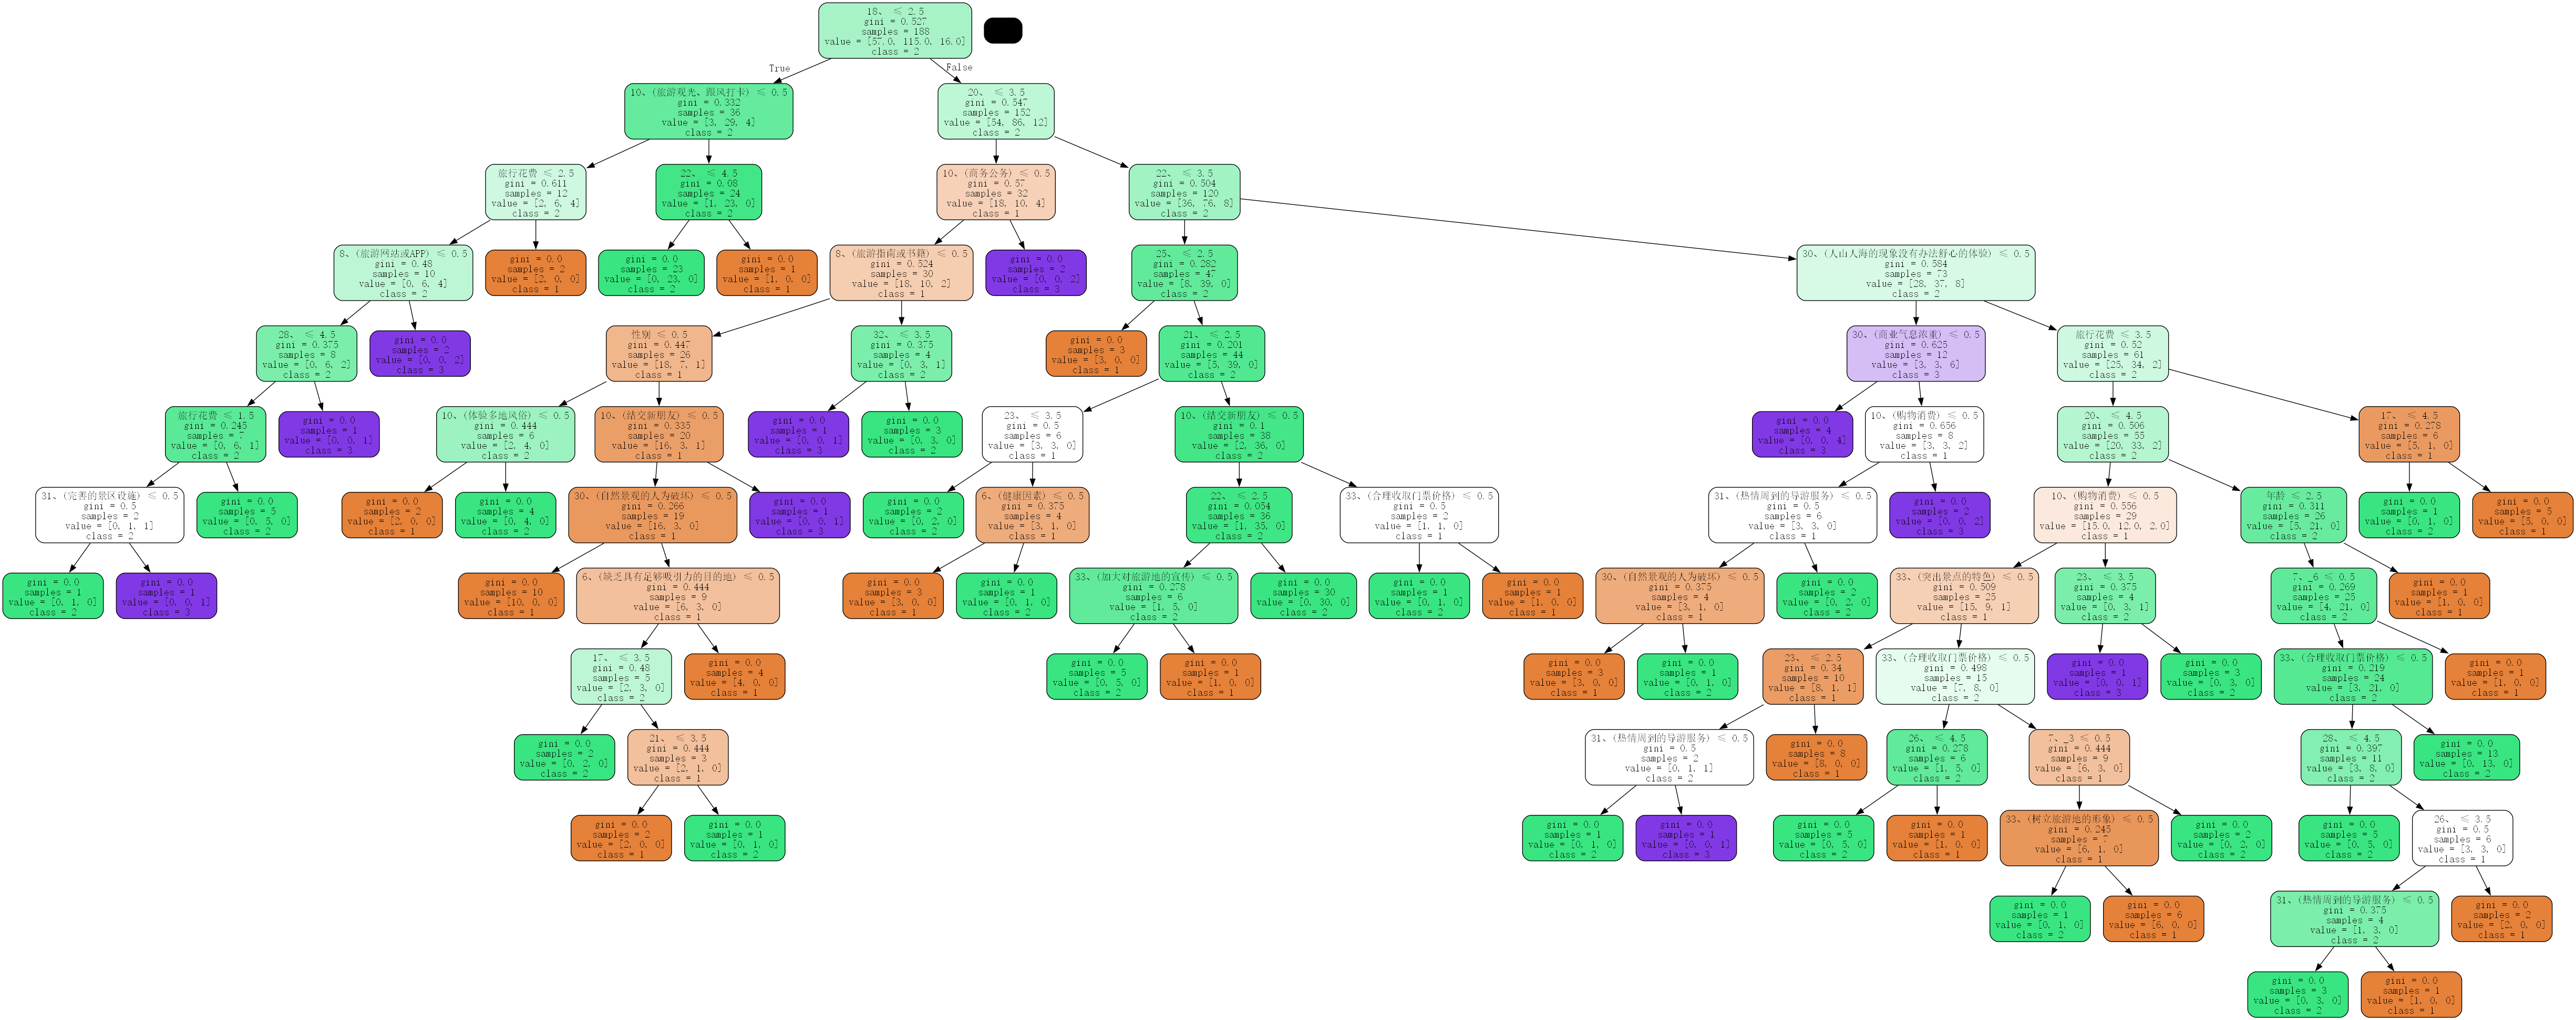

In [36]:
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
feature_names = data.columns[1:]
# 文件缓存
dot_data = StringIO()
# 将决策树导入到dot中
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_names,class_names=['1','2','3'],fontname='SimSun')
# 将生成的dot文件生成graph
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
# 将结果存入到png文件中
graph.write_png('clf.png')
# 显示
Image(graph.create_png())

In [37]:
from scipy.stats import chi2_contingency
cross_tab_1 = pd.crosstab(data['是否旅行'], data['旅行花费'])
chi2_contingency(cross_tab_1)

Chi2ContingencyResult(statistic=10.456190978039025, pvalue=0.01506104290877588, dof=3, expected_freq=array([[16.77659574, 14.35106383,  4.24468085,  2.62765957],
       [66.22340426, 56.64893617, 16.75531915, 10.37234043]]))

In [38]:
cross_tab_2 = pd.crosstab(data['年龄'], data['12、'])
chi2_contingency(cross_tab_2)

Chi2ContingencyResult(statistic=5.138557435149823, pvalue=0.27337380204441053, dof=4, expected_freq=array([[  2.42553191,   4.89361702,   0.68085106],
       [ 52.45212766, 105.82446809,  14.72340426],
       [  2.12234043,   4.28191489,   0.59574468]]))

In [39]:
cross_tab_2

12、,1,2,3
年龄,,,
1,5,2,1
2,50,109,14
3,2,4,1


In [40]:
cross_tab_3 = pd.crosstab(data['地区'], data['12、'])
chi2_contingency(cross_tab_3)

Chi2ContingencyResult(statistic=1.2146091852621428, pvalue=0.5448173965675356, dof=2, expected_freq=array([[12.73404255, 25.69148936,  3.57446809],
       [44.26595745, 89.30851064, 12.42553191]]))

In [41]:
cross_tab_3

12、,1,2,3
地区,,,
0,12,28,2
1,45,87,14


In [42]:
cross_tab_4 = pd.crosstab(data['性别'], data['12、'])
chi2_contingency(cross_tab_4)

Chi2ContingencyResult(statistic=2.3097723035080016, pvalue=0.3150934076932531, dof=2, expected_freq=array([[13.34042553, 26.91489362,  3.74468085],
       [43.65957447, 88.08510638, 12.25531915]]))

In [43]:
cross_tab_4

12、,1,2,3
性别,,,
0,11,27,6
1,46,88,10


In [44]:
cross_tab_5 = pd.crosstab(data['22、'], data['12、'])
chi2_contingency(cross_tab_5)

Chi2ContingencyResult(statistic=13.003079739632248, pvalue=0.11174369146376617, dof=8, expected_freq=array([[ 0.90957447,  1.83510638,  0.25531915],
       [ 8.18617021, 16.51595745,  2.29787234],
       [21.52659574, 43.43085106,  6.04255319],
       [19.10106383, 38.53723404,  5.36170213],
       [ 7.27659574, 14.68085106,  2.04255319]]))